# Managing experiment results

In this tutorial, we will use Neptune library for experiment results querying   
(https://docs.neptune.ai/usage/querying_metadata/)


In [2]:
# A script to collect test loss from neptune
# We will use already saved pandas dataframe for this tutorial

# import pandas as pd
# import neptune

# Make a list of neptune_id that you want to collect test loss from
# run_names = (
#     config_model_40M['ckpt_path'].split('/')[-2],
#     config_model_115M_test['ckpt_path'].split('/')[-2],
#     config_model_1B['ckpt_path'].split('/')[-2],
#     config_model_8B['ckpt_path'].split('/')[-2],
#     )

# Define the profile_dict
# flops_ntokens_params = [ v for v in profile_dict.values()]

# test_loss_df = pd.DataFrame(columns=['id', 'test_loss_epoch', 'FLOPs', 'model_size'])
# for i, neptune_id in enumerate(run_names):
#     run = neptune.init_run(
#         project="jubilant-choi/swiftv2-frontier" if 'FRONTIER' in neptune_id else "jubilant-choi/ds-test", 
#         mode="read-only",
#         with_id=neptune_id
#     )
#     try:
#         loss = run['training/test_loss_epoch'].fetch_values()['value'].tolist()
#     except:
#         loss = run['training/eval_test_loss_epoch'].fetch_values()['value'].tolist()

#     test_loss_df.loc[len(test_loss_df)] = [
#         neptune_id,
#         loss,
#         flops_ntokens_params[i][0],
#         flops_ntokens_params[i][2],
#     ]

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

test_loss_df = pd.read_csv('data/test_loss_df.csv')
test_loss_df

,id,test_loss_epoch,model_size,FLOPs
0,DSTES-210,"[1.3042930364608765, 0.9667508602142334, 0.467...",39791808,4.855207e+17
1,FRONTIER-105,"[0.36374157667160034, 0.18868373334407806, 0.1...",118225920,1.831081e+18
2,DSTES-223,"[1.205808162689209, 0.42266416549682617, 0.348...",1202718720,1.454444e+18
3,DSTES-336,"[0.33643725514411926, 0.22848273813724518, 0.2...",8767715328,1.086629e+19


In [12]:
def stringfy_model_size(params):
    # return model_size in string format like 40M, 117M, 1.2B, 8.8B
    model_size = ''
    if params < 10e+8:
        model_size = f"{round(params/10e+5)}M"
    else:
        model_size = f"{round(params/10e+8,1)}B"
    return model_size
test_loss_df.loc[:,'model_size_string'] = test_loss_df.model_size.map(stringfy_model_size)

In [42]:
def stringfy_model_size(params):
    # return model_size in string format like 40M, 117M, 1.2B, 8.8B
    model_size = ''
    if params < 10e+8:
        model_size = f"{round(params/10e+5)}M"
    else:
        model_size = f"{round(params/10e+8,1)}B"
    return model_size

test_loss_df.loc[:,'model_size_string'] = test_loss_df.model_size.map(stringfy_model_size)

test_loss_df.test_loss_epoch = test_loss_df.test_loss_epoch.map(lambda x: eval(x))

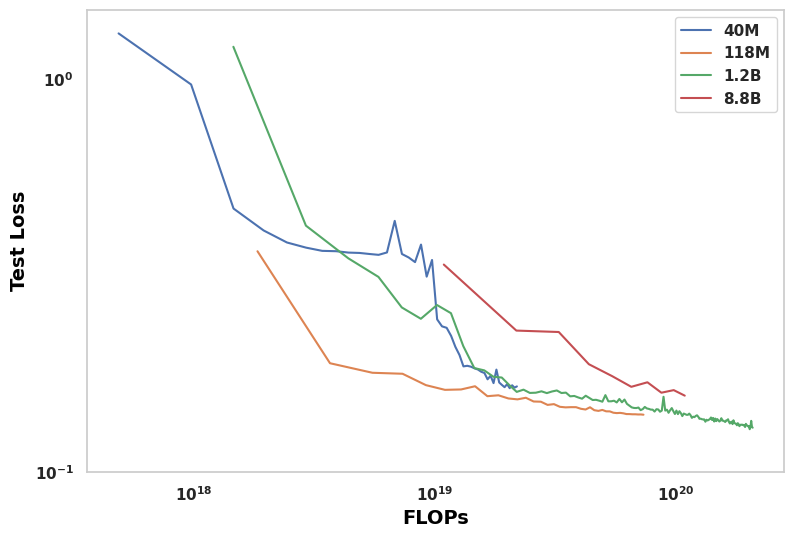

In [43]:
fig, ax2 = plt.subplots(figsize=(9, 6))

for i, row in test_loss_df.iterrows():
    flops = [ (x+1)*row['FLOPs'] for x in range(len(row['test_loss_epoch']))]
    ax2.loglog(flops, row['test_loss_epoch'], label=f"{row['model_size_string']}")
ax2.set_ylabel('Test Loss', color='black',fontsize=14,fontweight="bold")
ax2.set_xlabel('FLOPs', color='black',fontsize=14,fontweight="bold")
# set y-axis range from 1e-2 to 1e+1
ax2.set_ylim([1e-1, 1.5e+0])
# remove grid lines
ax2.grid(False)

plt.legend()
plt.show()